Importing necessary libraries for analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import norm, probplot

Loading the dataset

In [ ]:
fc = lambda x: datetime.datetime.strptime(x,"%Y-%m-%d")
data = pd.read_csv (r'C:\Users\Darshan Vithlani\Downloads\Bitcoin_dataset_updated.csv',index_col = 'Date', parse_dates = True, date_parser = fc)

Gold price, S&P500 index and oil WTI contain lots of NaN because markets do not operate on weekends. Fridays values are assigned to these NaN.

These values are filled using the forward fill method. It is acceptable because at the beginning of the bitcoin era the fees were rather constant.

In [4]:
data.fillna(method = 'ffill', inplace=True)
data.isnull().sum()

BTC price [USD]                           0
n-transactions                            0
fee [USD]                                 0
btc search trends                         0
Gold price[USD]                           0
SP500 close index                         0
Oil WTI price[USD]                        0
M2(Not seasonally adjusted)[1e+09 USD]    0
dtype: int64

In [4]:
data.head(10)

BTC price [USD]  n-transactions  fee [USD]  btc search trends  \
Date                                                                        
2014-01-02           749.27         54770.0       0.18                  8   
2014-01-03           781.23         60980.0       0.18                  8   
2014-01-04           807.39         52052.0       0.18                  8   
2014-01-05           828.74         58662.0       0.38                  8   
2014-01-06           904.98         67358.0       0.38                  8   
2014-01-07           915.69         62911.0       0.38                  8   
2014-01-08           790.00         61439.0       0.18                  8   
2014-01-09           823.30         59031.0       0.18                  8   
2014-01-10           826.28         54166.0       0.18                  8   
2014-01-11           853.99         55856.0       0.21                  8   

            Gold price[USD]  SP500 close index  Oil WTI price[USD]  \
Date                                                                 
2014-01-02           1225.0            1831.98               95.14   
2014-01-03           1238.4            1831.37               93.66   
2014-01-04           1238.4            1831.37               93.66   
2014-01-05           1238.4            1831.37               93.66   
2014-01-06           1237.8            1826.77               93.12   
2014-01-07           1229.4            1837.88               93.31   
2014-01-08           1225.3            1837.49               91.90   
2014-01-09           1229.3            1838.13               91.36   
2014-01-10           1246.7            1842.37               92.39   
2014-01-11           1246.7            1842.37               92.39   

            M2(Not seasonally adjusted)[1e+09 USD]  
Date                                                
2014-01-02                                 11089.3  
2014-01-03                                 11089.3  
2014-01-04                                 11089.3  
2014-01-05                                 11089.3  
2014-01-06                                 11089.3  
2014-01-07                                 11089.3  
2014-01-08                                 11089.3  
2014-01-09                                 11089.3  
2014-01-10                                 11089.3  
2014-01-11                                 11089.3

In [64]:
data.describe().round(2)

BTC price [USD]  n-transactions  fee [USD]  btc search trends  \
count          2313.00         2313.00    2313.00            2313.00   
mean           3616.14       214401.25       1.50              11.18   
std            3877.08        96042.29       4.55              13.99   
min             172.00        47740.00       0.03               2.00   
25%             440.03       121973.00       0.09               3.00   
50%            1056.00       224394.00       0.31               7.00   
75%            6763.75       291597.00       1.02              13.00   
max           19279.90       490644.00      54.79             100.00   

       Gold price[USD]  SP500 close index  Oil WTI price[USD]  \
count          2313.00            2313.00             2313.00   
mean           1337.79            2398.49               58.57   
std             110.56             403.46               18.69   
min            1070.80            1741.89              -36.98   
25%            1272.40            2058.69               47.57   
50%            1321.20            2345.96               53.95   
75%            1385.10            2749.76               64.22   
max            1768.90            3386.15              107.95   

       M2(Not seasonally adjusted)[1e+09 USD]  
count                                 2313.00  
mean                                 13286.78  
std                                   1350.45  
min                                  11089.30  
25%                                  12058.70  
50%                                  13467.30  
75%                                  14209.70  
max                                  17269.80

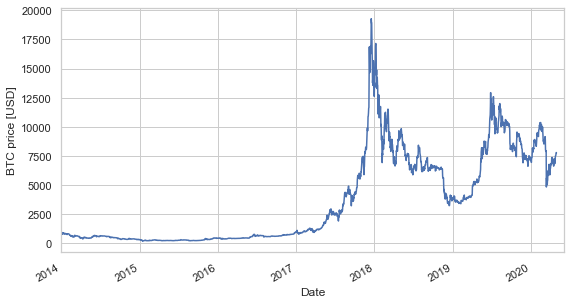

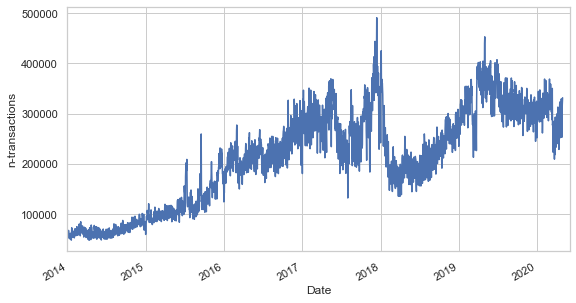

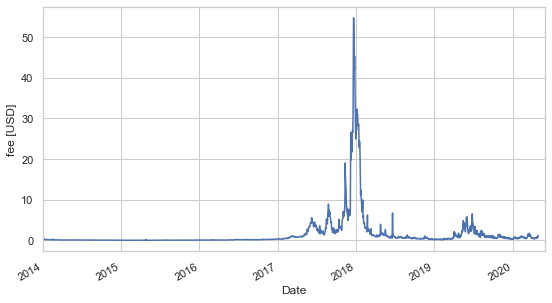

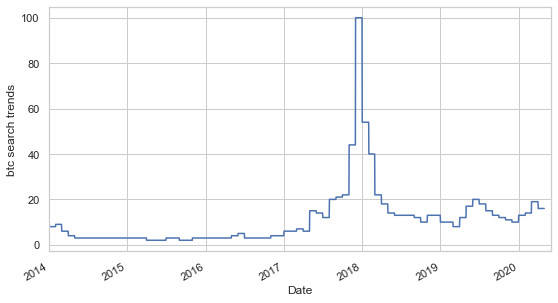

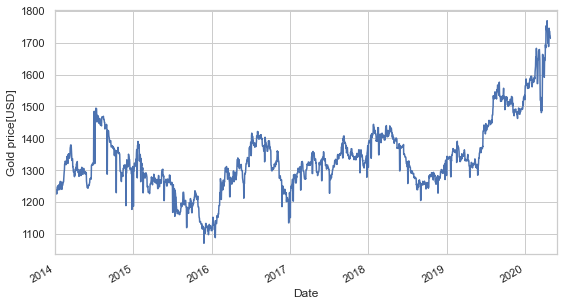

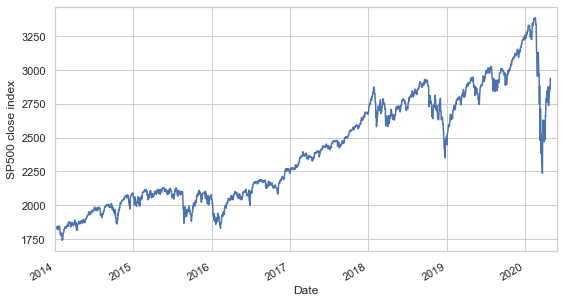

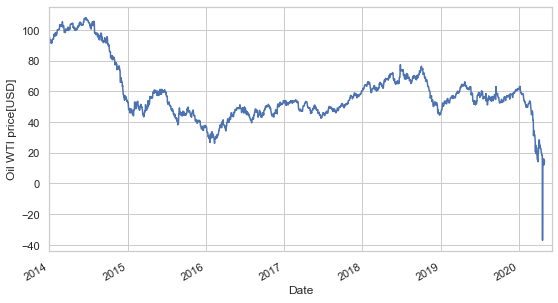

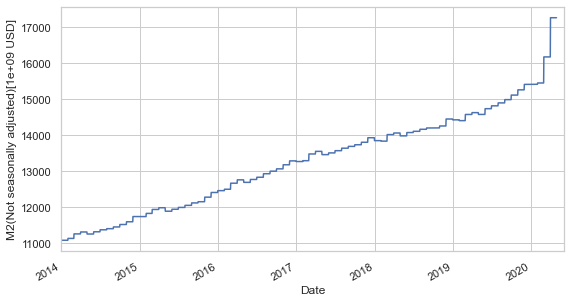

In [66]:
datemin = datetime.date(data.index.min().year, data.index.min().day-1, 1)
datemax = datetime.date(data.index.max().year, data.index.max().month + 2, 1)
sns.set(style="whitegrid", color_codes=True)

for i in data.columns:

    fig,ax = plt.subplots(figsize = (9, 5))      
    data[i].plot(kind = 'line', ax=ax)
    plt.gcf().autofmt_xdate()
    ax.set_xlabel('Date')
    ax.set_ylabel(str(i))
    ax.set_xlim([datemin,datemax])
    plt.show()

2. Charts showing a comparison of the price of bitcoin with other variables in function of time after normalization

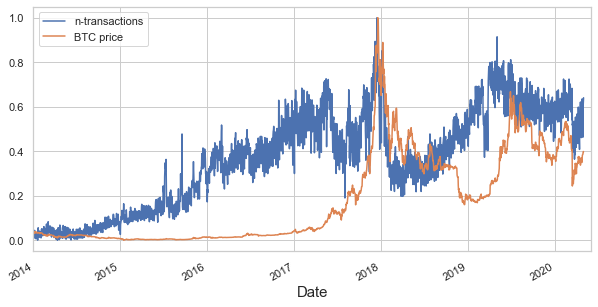

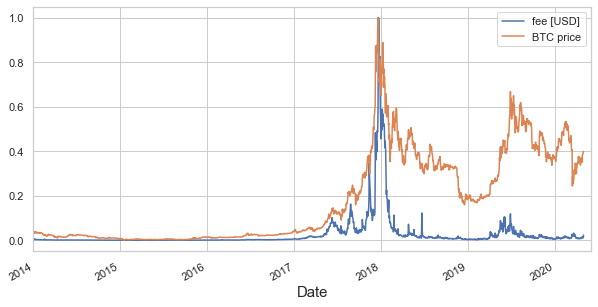

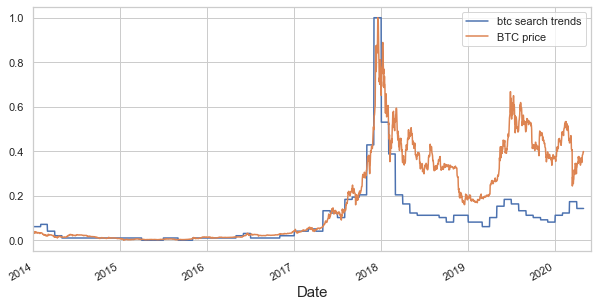

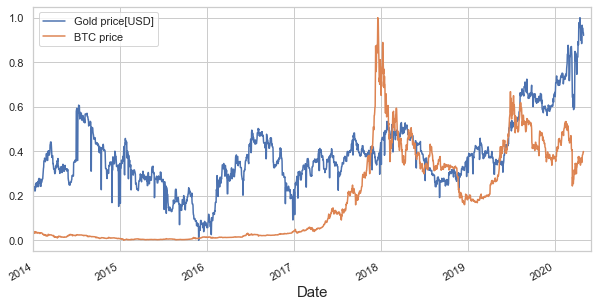

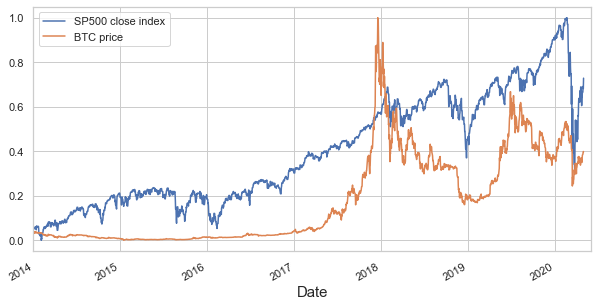

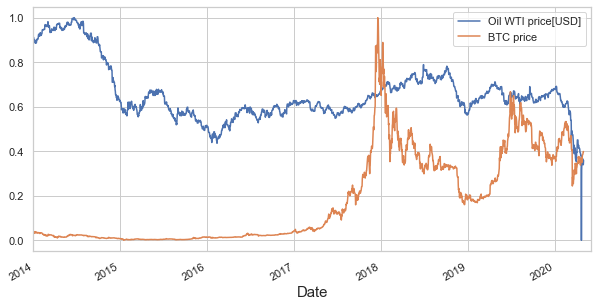

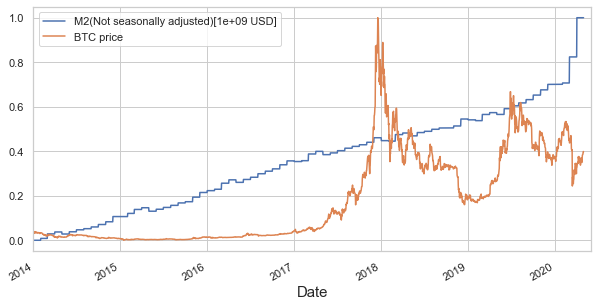

In [6]:
data2 = data.copy()
mms = MinMaxScaler()
for i in data2.columns:
    data2[i] = mms.fit_transform(data[[i]])
    
for i in data2.iloc[:,1:].columns:
    fig, ax = plt.subplots(figsize = (10, 5))
    data2[i].plot(ax = ax, label = i)
    data2.iloc[:,0].plot(ax = ax, label = 'BTC price')
    plt.gcf().autofmt_xdate()
    ax.set_xlabel('Date', fontsize = 15)
    ax.set_xlim([datemin, datemax])
    ax.legend()
    plt.show()

In [54]:
data2.head()

Date  BTC price [USD]  n-transactions  fee [USD]  btc search trends  \
0  0.000000         0.030211        0.015873   0.002739           0.061224   
1  0.000433         0.031884        0.029894   0.002739           0.061224   
2  0.000866         0.033253        0.009736   0.002739           0.061224   
3  0.001299         0.034370        0.024660   0.006392           0.061224   
4  0.001732         0.038360        0.044294   0.006392           0.061224   

   Gold price[USD]  SP500 close index  Oil WTI price[USD]  \
0         0.220885           0.054791            0.911613   
1         0.240080           0.054420            0.901401   
2         0.240080           0.054420            0.901401   
3         0.240080           0.054420            0.901401   
4         0.239221           0.051622            0.897675   

   M2(Not seasonally adjusted)[1e+09 USD]  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     0.0  
4                                     0.0

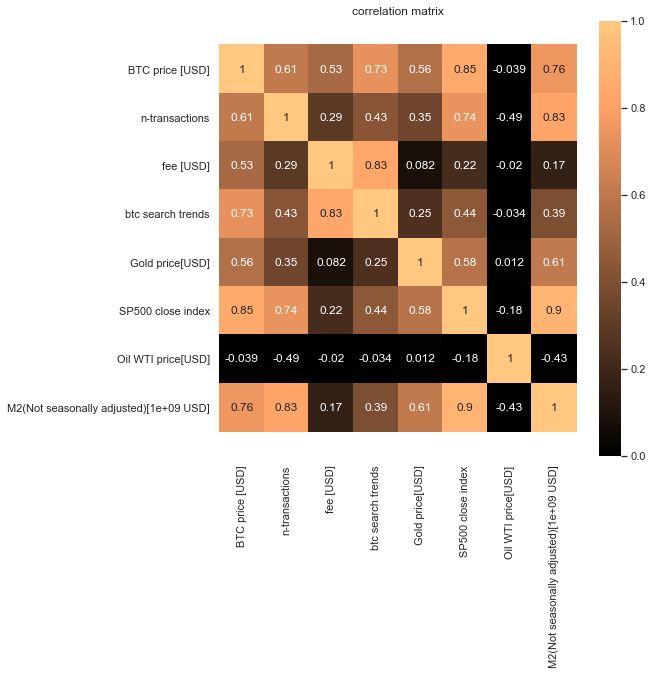

BTC price [USD]  n-transactions  \
BTC price [USD]                                  1.0000          0.6118   
n-transactions                                   0.6118          1.0000   
fee [USD]                                        0.5295          0.2904   
btc search trends                                0.7313          0.4314   
Gold price[USD]                                  0.5637          0.3538   
SP500 close index                                0.8529          0.7418   
Oil WTI price[USD]                              -0.0394         -0.4876   
M2(Not seasonally adjusted)[1e+09 USD]           0.7568          0.8251   

                                        fee [USD]  btc search trends  \
BTC price [USD]                            0.5295             0.7313   
n-transactions                             0.2904             0.4314   
fee [USD]                                  1.0000             0.8322   
btc search trends                          0.8322             1.0000   
Gold price[USD]                            0.0816             0.2458   
SP500 close index                          0.2194             0.4429   
Oil WTI price[USD]                        -0.0199            -0.0337   
M2(Not seasonally adjusted)[1e+09 USD]     0.1661             0.3906   

                                        Gold price[USD]  SP500 close index  \
BTC price [USD]                                  0.5637             0.8529   
n-transactions                                   0.3538             0.7418   
fee [USD]                                        0.0816             0.2194   
btc search trends                                0.2458             0.4429   
Gold price[USD]                                  1.0000             0.5769   
SP500 close index                                0.5769             1.0000   
Oil WTI price[USD]                               0.0117            -0.1756   
M2(Not seasonally adjusted)[1e+09 USD]           0.6101             0.9040   

                                        Oil WTI price[USD]  \
BTC price [USD]                                    -0.0394   
n-transactions                                     -0.4876   
fee [USD]                                          -0.0199   
btc search trends                                  -0.0337   
Gold price[USD]                                     0.0117   
SP500 close index                                  -0.1756   
Oil WTI price[USD]                                  1.0000   
M2(Not seasonally adjusted)[1e+09 USD]             -0.4341   

                                        M2(Not seasonally adjusted)[1e+09 USD]  
BTC price [USD]                                                         0.7568  
n-transactions                                                          0.8251  
fee [USD]                                                               0.1661  
btc search trends                                                       0.3906  
Gold price[USD]                                                         0.6101  
SP500 close index                                                       0.9040  
Oil WTI price[USD]                                                     -0.4341  
M2(Not seasonally adjusted)[1e+09 USD]                                  1.0000

In [68]:
fig, ax = plt.subplots(figsize = (8, 8))
ax = sns.heatmap(data2.corr(), vmin = 0, vmax = 1, annot = True, cmap = 'copper')#plasma,copper,coolwarm,gist_heat
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('correlation matrix')
plt.show()
data.corr().round(4)

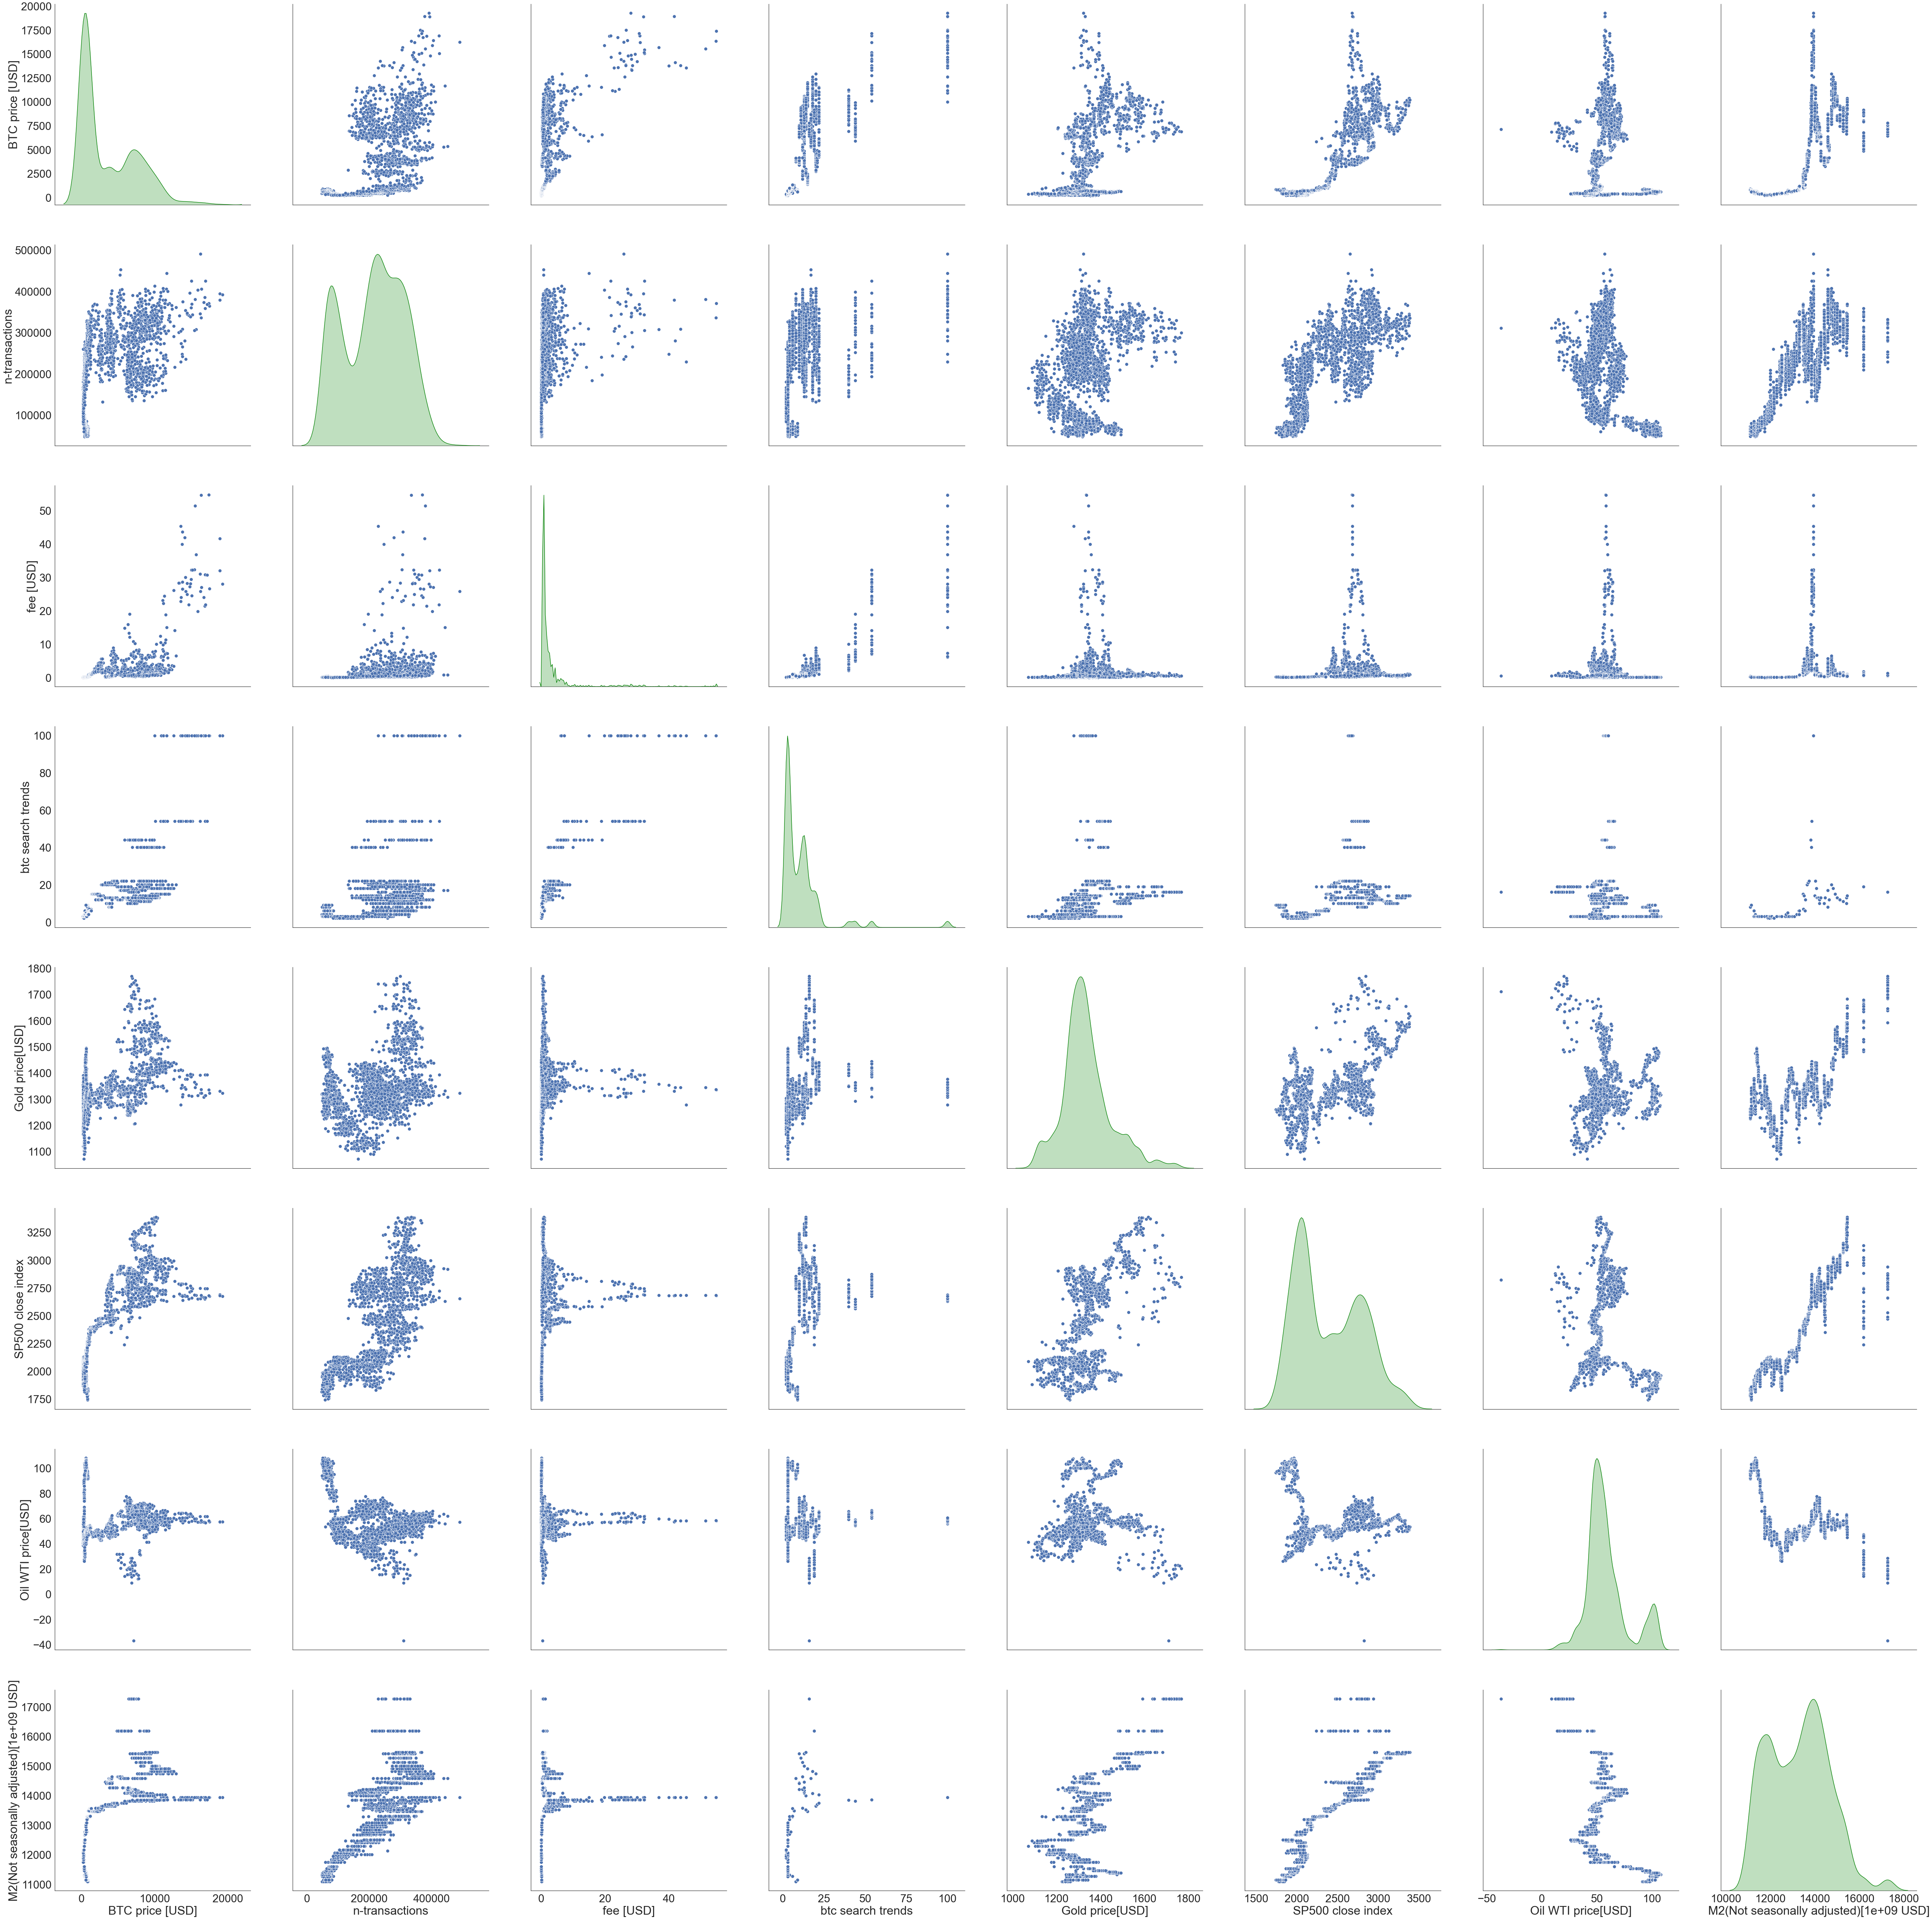

In [60]:
sns.set(style = 'white', font_scale = 3)
sns.pairplot(data,
             aspect = 1,
             diag_kind = 'kde', 
             height = 10, 
             diag_kws = {'color': 'green'}, 
             plot_kws = {'s': 100, 'marker': 'o'})
plt.xticks(rotation = 45)
fig.tight_layout()
plt.show()

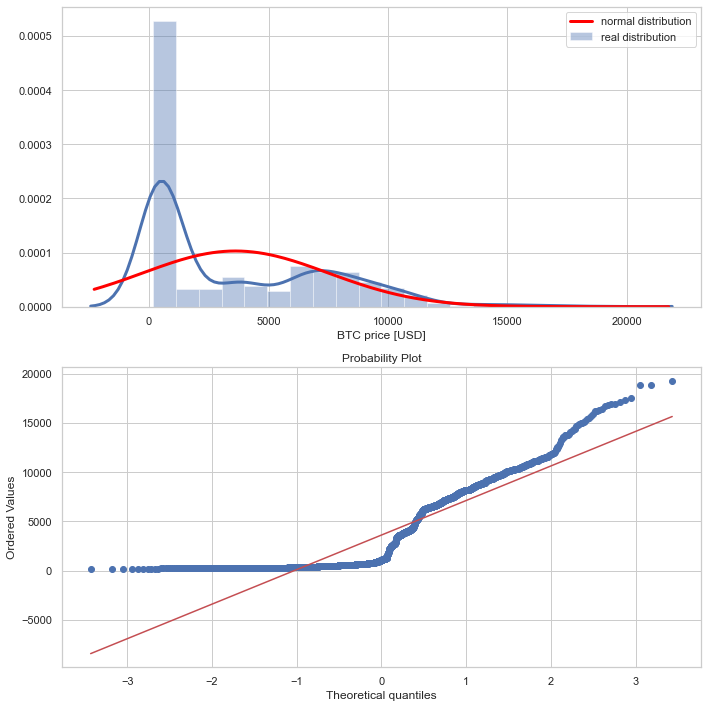

In [63]:
sns.set(style = 'whitegrid', font_scale = 1)
fig, ax = plt.subplots(nrows = 2, figsize=(10,10))
sns.distplot(data['BTC price [USD]'], 
             fit = norm,  
             kde_kws = {'lw': 3}, 
             fit_kws = {'color': 'red', 'lw': 3},
             ax = ax[0]);
ax[0].legend(['normal distribution','real distribution'])
probplot(data['BTC price [USD]'], plot=ax[1])
fig.tight_layout()

5. Variance inflation factor

In [19]:
def vif(dataset):
    X = data2.drop(columns = ['BTC price [USD]'])    
    X = sm.add_constant(X)
    return pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns).iloc[1:]

ds=vif(data)
print(ds)
print("\n")
print('variables with large (>5) VIF:')
ds[ds > 5]

n-transactions                             3.973424
fee [USD]                                  3.778416
btc search trends                          4.348378
Gold price[USD]                            2.068916
SP500 close index                          8.563969
Oil WTI price[USD]                         2.307268
M2(Not seasonally adjusted)[1e+09 USD]    14.679181
dtype: float64


variables with large (>5) VIF:


SP500 close index                          8.563969
M2(Not seasonally adjusted)[1e+09 USD]    14.679181
dtype: float64

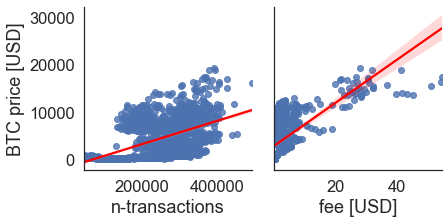

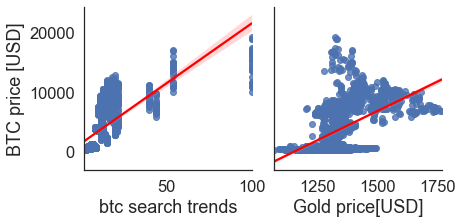

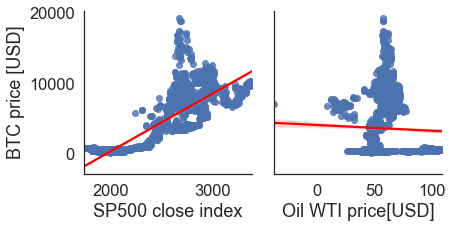

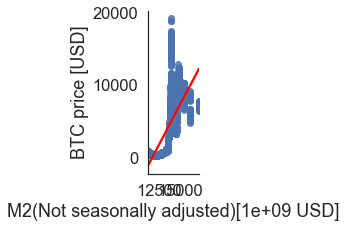

In [43]:
sns.set(style = 'white', font_scale = 1.5)
col_in_rows = 2   
for i in range(1, len(data.columns), col_in_rows):
    g = sns.PairGrid(data, y_vars = 'BTC price [USD]', x_vars = data.columns[i:i+col_in_rows], height = 3)
    g.map(sns.regplot, order = 1, line_kws = {'color': 'red'})